In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os 
os.getcwd()

'C:\\Users\\mavridis\\OneDrive - Qualcomm\\Documents\\python\\w_2_metric'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'abrupt.csv',
 'analysis.ipynb',
 'increasing.csv',
 'new_abrupt.csv',
 'periodic.csv']

Find the csv files

In [7]:
csv_files = [f for f in os.listdir() if f.split('.')[-1] == 'csv']
csv_files

['abrupt.csv', 'increasing.csv', 'new_abrupt.csv', 'periodic.csv']

Read the csv files in pandas

In [28]:
def read_csv(fname):
    '''
    Reads a csv file and returns a pandas dataframe
    '''
    df = pd.read_csv(fname, header=None)
    df.columns = [fname.split('.')[0]+str(i) for i in df.columns]
    return df

In [45]:
df_total = pd.DataFrame()
for f in csv_files:
    df = read_csv(f)
    if df_total.empty:
        df_total = df
    else:
        df_total = df_total.join(df)
    
df_total

,abrupt0,abrupt1,increasing0,increasing1,new_abrupt0,new_abrupt1,periodic0,periodic1
0,46.000033,0.000000,0,0,9.996301e-08,13.814817,500.0,1000.0
1,46.000828,0.000100,1,1,1.248813e-05,52.929583,1000.0,1000.0
2,46.002663,0.002000,2,2,7.273028e-05,84.467200,1000.0,1000.0
3,46.005492,0.000012,3,3,2.188727e-04,111.986211,1000.0,1000.0
4,46.009239,0.000061,4,4,4.887357e-04,136.565808,1000.0,1000.0
...,...,...,...,...,...,...,...,...
1995,4387.226981,3816.285423,1995,1995,2.652823e+03,1101.554001,0.0,1000.0
1996,4142.473971,3839.159410,1996,1996,2.652883e+03,941.589182,0.0,1000.0
1997,4021.553671,3861.691547,1997,1997,2.652941e+03,780.197199,0.0,1000.0
1998,3975.785417,3883.878784,1998,1998,2.652997e+03,617.645203,0.0,1000.0


In [57]:
cols = df_total.shape[-1]
cols

8

In [58]:
cols_2 = np.ceil(cols/2).astype(int)
cols_2

4

In [60]:
for i,c in enumerate(df_total.columns):
    print(i,c)

0 abrupt0
1 abrupt1
2 increasing0
3 increasing1
4 new_abrupt0
5 new_abrupt1
6 periodic0
7 periodic1


C:\Users\mavridis\AppData\Local\Continuum\anaconda3\envs\data\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


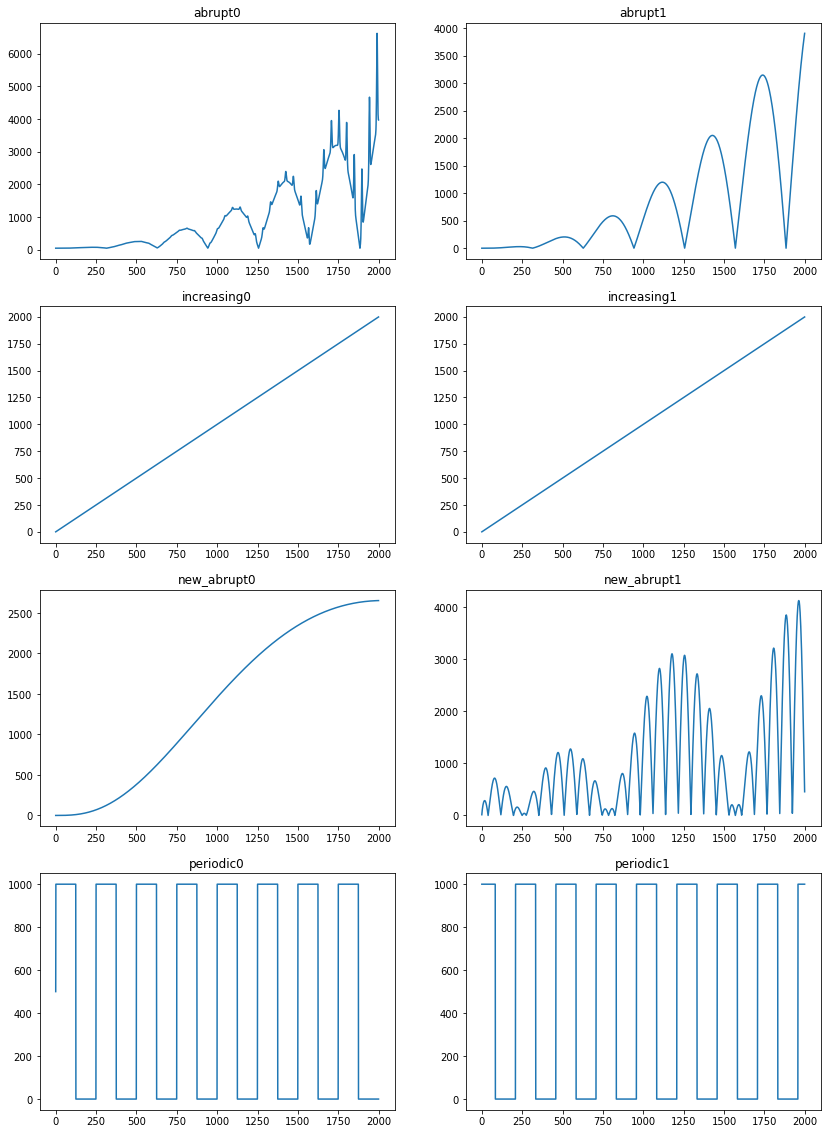

In [66]:
plt.figure(figsize=(14,5*cols_2))
plt.subplot(cols_2,2,1)
for i,c in enumerate(df_total.columns):
    ax = plt.subplot(cols_2, 2, i+1)
    plt.title(c)
    plt.plot(df_total[c])